# Script for studying the use of graphs in python:

In [1]:
import numpy as np
from random import uniform,randint
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from scipy import signal
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import networkx as nx
import math
#import jgraph as ig

In [2]:
from modules.distances import l1dist, l2dist, distgraph

In [3]:
## Sorting point masses into the 2D space:
xmin = -10.0
xmax = +10.0
ymin = -10.0
ymax = +10.0

npoints = 50
x = np.zeros(npoints)
y = np.zeros(npoints)
node = np.zeros(npoints)

In [4]:
for i in range(npoints):
    node[i] = i
    x[i] = uniform(xmin,xmax)
    y[i] = uniform(ymin,ymax)

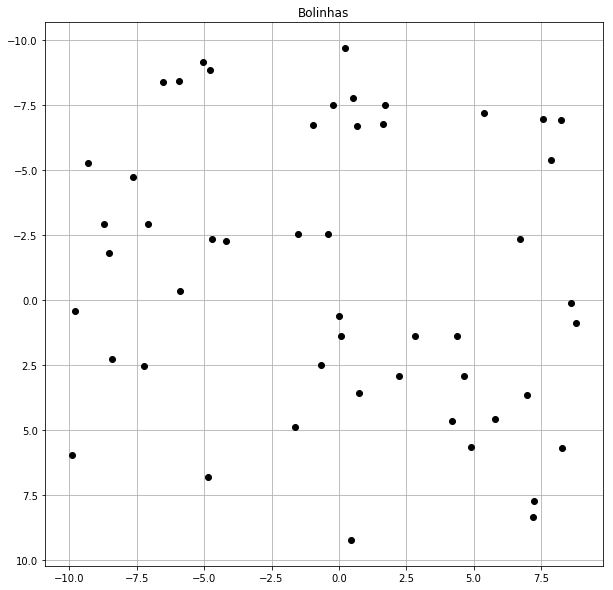

In [17]:
###--------##########################
plt.figure( figsize=(10,10) )
p1 = plt.plot(x, y, 'ok' )
plt.title('Bolinhas')
plt.grid()

plt.xlim( min(x)-1.0, max(x)+1.0 )
plt.ylim( min(y)-1.0, max(y)+1.0 )

plt.gca().invert_yaxis()
plt.savefig('test_graph.png',dpi=300,transparent=True)
plt.show()

In [8]:
# Lets see what's going on here:
S = nx.Graph()
for i in range(npoints):
    S.add_node(i) #,pos=(x[i],y[i]) )
    for j in range(npoints):
        S.add_edge(i,j,weight=l2dist(x,y)[i][j])
TS = nx.minimum_spanning_tree(S)


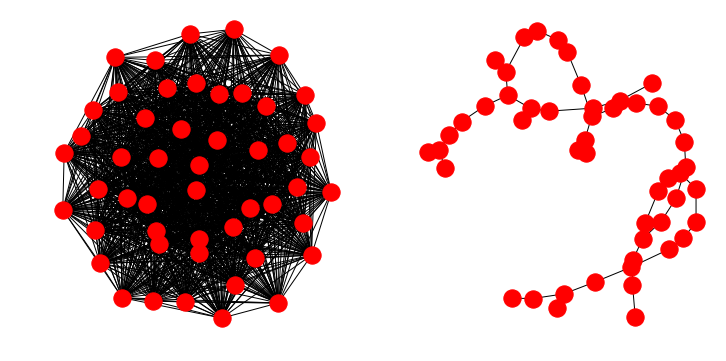

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(S)
plt.subplot(122)
nx.draw(TS)
plt.show()

# TODO: Entender as saidas do MST para podermos calcular a funcao de equidistancia para calcular a funcao $\theta$

># <center> $\theta = \sum_i (d_{mst}^i - \overline{d_{mst}})^2$

In [15]:
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi, dmst = distgraph(TS)
print(phi, dmst) #NEGATIVO - MATEMATICAMENTE CERTO

(53.079928366029151, 1.8875433785316025)


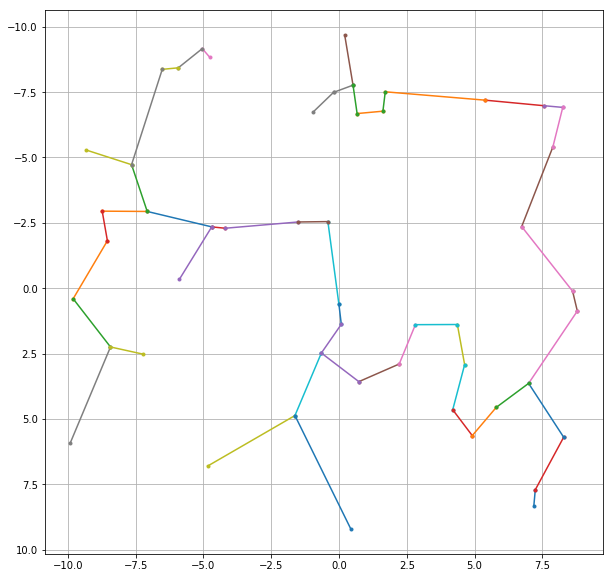

In [22]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10) )

for (i, j, d) in TS.edges.data('weight'): 
    xt = [ x[i], x[j] ]
    yt = [ y[i], y[j] ]
    plt.plot(xt,yt,'.-')
plt.grid()
plt.gca().invert_yaxis()
plt.show()


# TODO: Fazer testes simples para verificar a função distGraf:
> 1) um circulo de pontos igualmente espaçados e aleatorios; <br>
> 2) um retangulo de pontos igualmente espaçados e aleatórios; <br>
> 3) plotar a àrvore com os índices dos vértices para identificação;<br>